# Loan Data Exploration

This data set contains 113,937 loans including loan amount, borrower rate (or interest rate), current loan status, borrower income,List of reasons for taking the loan ,and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

In [4]:
#  ProsperRating (alpha) into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [5]:
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [6]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


Take a subset of the features

In [7]:
# Subset the dataframe by selecting features of interest
features = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
df1 = df[features]

In [8]:
df1.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed


In [9]:
# remove rows with missing values
df1 = df1.dropna()

In [10]:
df1.shape

(84853, 6)

### What is the structure of your dataset?

The dataset contained 113937 rows with 81 columns. However, it was reduced to 84853 rows and 6 columns after filtering the features and dropping the rows with null values.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the Annual Percentage Rate (APR).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that original loan amount will have a negative effect on the APR. 

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: APR.

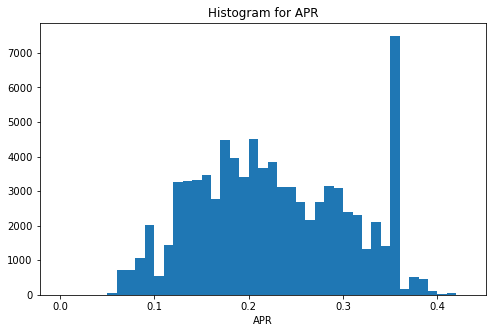

In [29]:
# start with a standard-scaled plot
binsize = 0.01
bins = np.arange(0, df1.BorrowerAPR.max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'BorrowerAPR', bins = bins);
plt.xlabel('APR');
plt.title('Histogram for APR')
plt.show()

The APR distribution looks roughly bimodal, with one very sharp peak at about 0.35.

Next up, the first predictor variable of interest: LoanOriginalAmount.

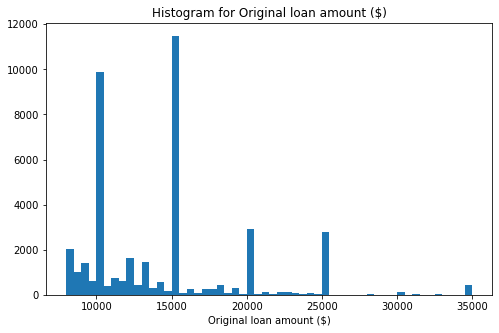

In [28]:
binsize = 500
bins = np.arange(8000, df1.LoanOriginalAmount.max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');
plt.title('Histogram for Original loan amount ($)')
plt.show()


There are very large spikes in frequency at the bars with multiples of 5K (e.g. 10K, 15K, 20K); frequency quickly trails off until the next spike. 

I'll now move on to another variable: stated monthly income.

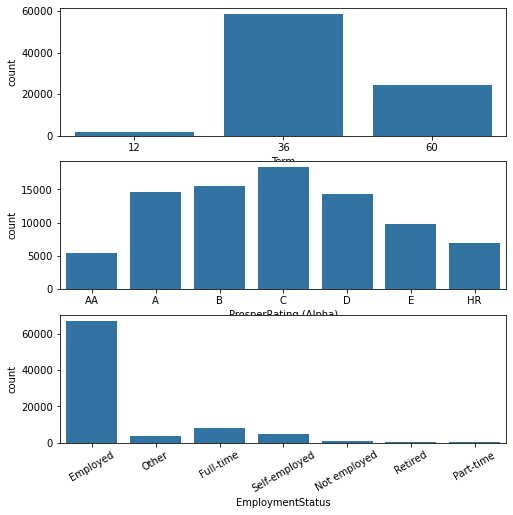

In [13]:
fig, ax = plt.subplots(nrows=3, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = df1, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = df1, x = 'EmploymentStatus', color = default_color, ax = ax[2]);
plt.xticks(rotation=30);

The majority of the loans have a 36 months period. And most of the borrowrs are employed and have C Prosper Rating،We note that we made use of ProsperRating (Alpha) for graph reading purposes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The APR distribution of borrowrs looks bimodel. We did not need to perform any transformations since there were no outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the original loan amount is skewed. I did not see the need to perform any data transformation

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [18]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
categoric_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']

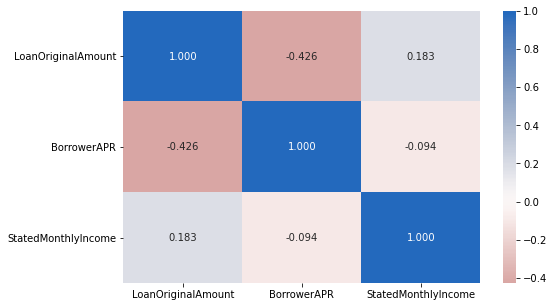

In [22]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df1[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()


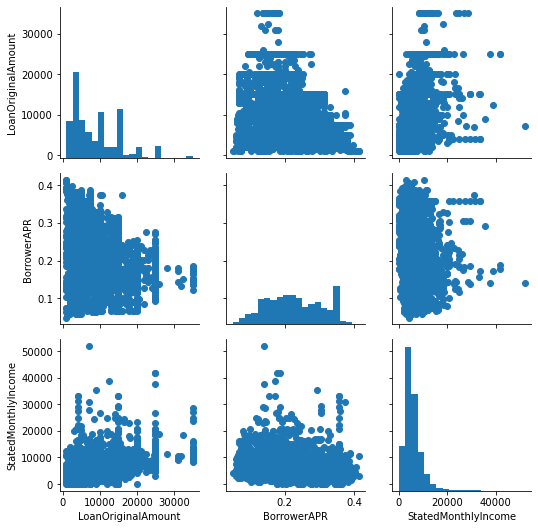

In [27]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster


Loan_samp = df1.sample(5000)
g = sb.PairGrid(data = Loan_samp.dropna(), vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
plt.show()

As expected, the higher the loan amount, the lower the APR. meaning that the loan original amount and the APR are negatively correlated, also is shows that the monthely income and loan original amount are positively correlated, this is not too surprising since the higher the salary the higher the loan become  


Let's move on to looking at how loan original amount, monthley income and APR correlate with the categorical variables.

D:\1111\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
D:\1111\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\1111\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\1111\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other

<Figure size 720x720 with 0 Axes>

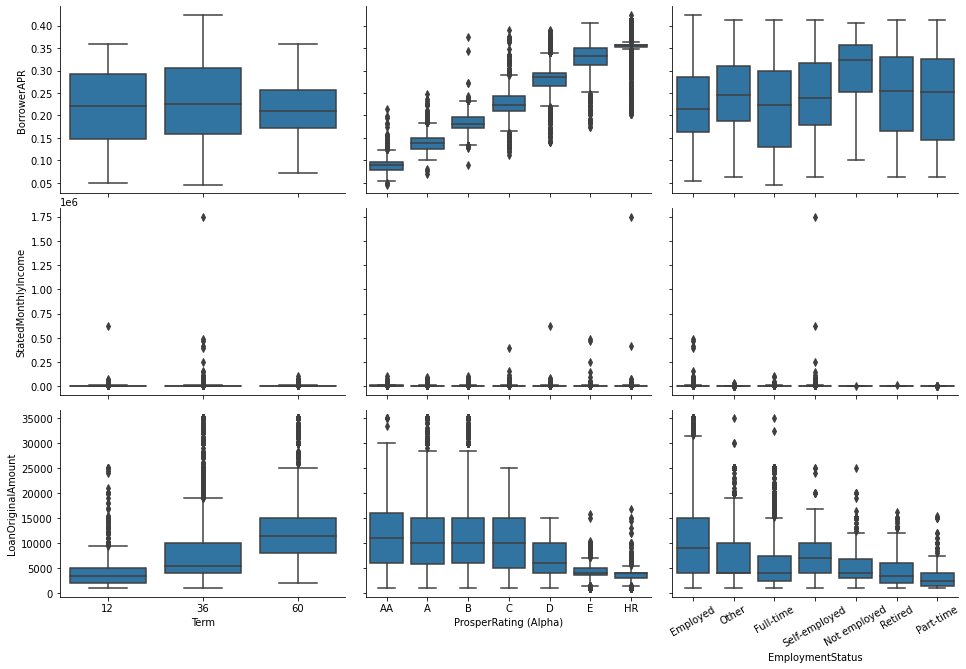

In [26]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df1, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = categoric_vars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);
plt.show()

Interestingly, it show that there is a postive relationships between the loan amount and the loan term. The APR become lower with higher rating, meaning that having high rating can result in lower APR، We note that we made use of ProsperRating (Alpha) for graph reading purposes

Finally, let's look at relationships between the three categorical features.

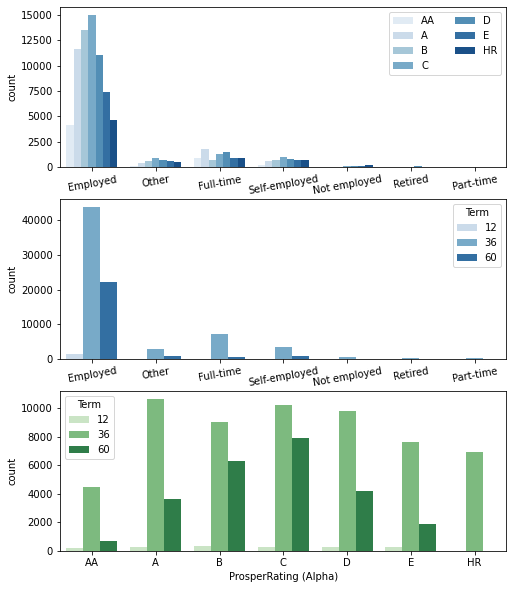

In [30]:
plt.figure(figsize = [8, 10])


# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 1)
sb.countplot(data = df1, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df1, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)


# subplot 1: Prosper rating vs term
plt.subplot(3,1,3)
sb.countplot(data = df1, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Greens')



plt.show()


There seems to be  an interaction between term and Prosper rating, as for the EmploymentStatus and ProsperRating there seems to be no interaction, that also apply to the EmploymentStatus and term.


With the preliminary look at bivariate relationships out of the way.
Now, I want to see how loan original amount and APR are related to one another for all of the data.

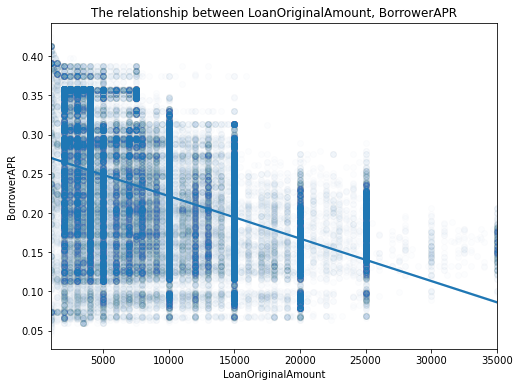

In [31]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df1, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.title('The relationship between LoanOriginalAmount, BorrowerAPR')
plt.show()

This plot shows that borrower APR is negatively correlated with loan amount. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

APR had a negative correlation with the loan original amount, indecating the higher the loan amount the lower the APR, it also show that the effect of a rating has a high impact on the APR, having a high rating resulting in a lower APR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected relationships were found in the association between the loan amount and the monthly income, the higher the income the higher the loan amount showing a positively correlataion between these two variables  


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the Prosper rating and term play into the relationship between loan amount and APR.

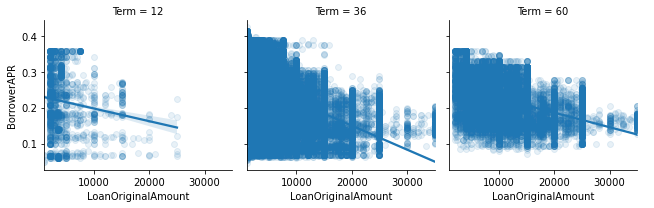

In [32]:
# Term effect on relationship of APR/ loan amount
g=sb.FacetGrid(data=df1, col='Term')
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

There dosn't seems to be a relationship between the term and APR/loan amount.

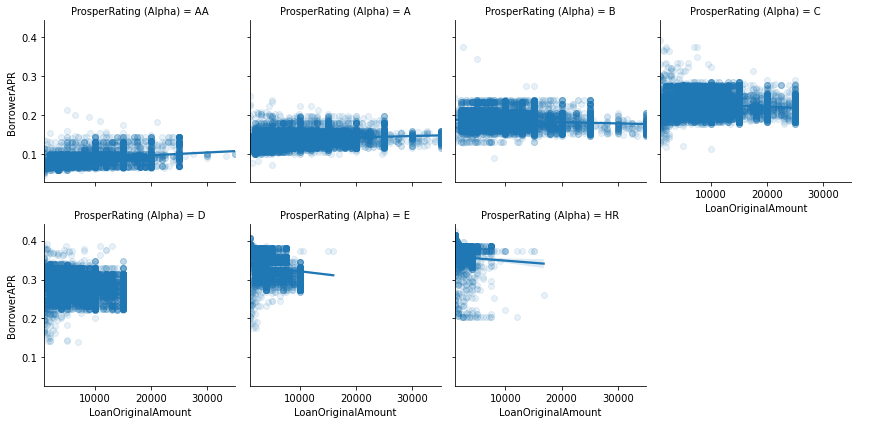

In [33]:
# Prosper rating effect on relationship of APR/ loan amount
g=sb.FacetGrid(data=df1, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

There seems to be a realationship between rating and loan amount, the higher the rating the higher the loan amount become, and with higher rating comes a lower APR, showing that people with AA or A borrow more money compare to the rest, increasing the APR can help reduce AA or A people. 

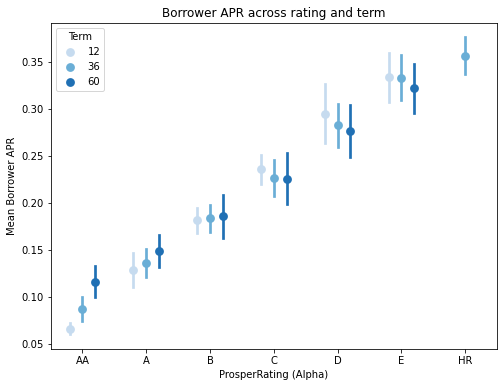

In [34]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df1, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

A dodged point plot shows that a borrwer with HR/C rating are having a higher APR,AA and A have lower APR. This demonstrate that by having a high rating you can have a lower APR.

Now, I want to look at the realationship between the rating and term effects on stated monthly income and loan original amount. 

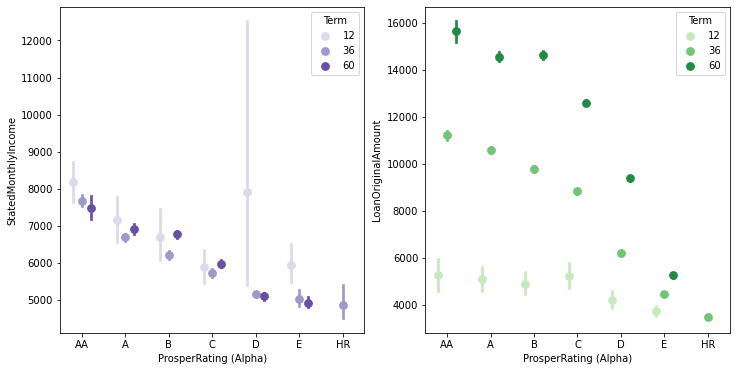

In [35]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df1, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);
sb.pointplot(data = df1, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
plt.show()

The graph show that there dosen't seems to be a relationship between the rating, monthley income and term, however the relationship between the rating, loan amount and term seems to indecate that with high rating increases the loan amount and all terms (12,36,60) 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of APR against loan amount in this section by looking at the impact of the Prosper rating. The multivariate exploration here showed that there indeed is a negative effect of increased Prosper ratings on loan amount,then by looking at the relationship between the Prosper rating, loan amount and term,it can be concluede that a high rating motivate to get a high loan amount resulting in a longer term.

### Were there any interesting or surprising interactions between features?

APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.